## Skittles Clean

In [1]:
from Game import *

Version:  0.2.27


In [5]:
def initial_state():
    state = Board(5,6)
    
    for i in range(30):
        state[i] = 1
        
    return state


def valid_moves(state,player):
    moves = []
    for location in range(30):
        if state[location] == 1:
            moves.append(location)
            
    return moves


def show_state(state):
    print(state)

    
def update_state(state,player,move):
    new_state=state
    r_start,c_start = state.rc_from_index(move)
    for c in range(c_start,6):
        for r in range(r_start,5):
        
            
            new_state[r,c]=0
            
    return new_state


def win_status(state,player):
    if state[0] == 0:
        return "lose"

In [6]:
skittles_agent=Agent(skittles_move)
skittles_agent.post=skittles_after
skittles_agent.T=Table()  # makes an empty table

NameError: name 'skittles_move' is not defined

In [4]:
def human_move(state,player):
    move=int(input("Choose a number from below?"))
    return move
human_agent=Agent(human_move)


def random_move(state,player):
    
    move=random.choice(valid_moves(state,player))
    return move


random_agent=Agent(random_move)

In [98]:
def skittles_move(state,player,info):
    T=info.T
    last_state=info.last_state
    last_action=info.last_action
    
    if state not in T:
        actions=valid_moves(state,player)
        T[state]=Table()
        for action in actions:
            T[state][action]=2  # initial number of skittles
    
    
    move=weighted_choice(T[state])
    
    if move is None:  
        
        # learn
        if last_state:
            T[last_state][last_action]-=1 # take away a skittle
            if T[last_state][last_action]<0:
                T[last_state][last_action]=0
    
        return random_move(state,player)
    else:
        return move

In [99]:
def skittles_after(status,player,info):
    # not return anything but...
    # will adjust the skittles table if lost the game
    T=info.T
    last_state=info.last_state
    last_action=info.last_action

    if status=='lose':  # only learn when you lose
        T[last_state][last_action]-=1 # take away a skittle
        if T[last_state][last_action]<0:
            T[last_state][last_action]=0

In [116]:
from Game.minimax import *
def minimax_move(state,player):

    values,moves=minimax_values(state,player, maxdepth = 5, display=True)
    return top_choice(moves,values)


minimax_agent=Agent(minimax_move)

In [117]:
skittles1_agent=Agent(skittles_move)
skittles1_agent.post=skittles_after
skittles1_agent.T=Table()  # makes an empty table
skittles1_agent.learning=True

skittles2_agent=Agent(skittles_move)
skittles2_agent.post=skittles_after
skittles2_agent.T=Table()  # makes an empty table
skittles2_agent.learning=True

In [118]:
g=Game()
g.run(random_agent,skittles_agent)

====
Game  1
 1  1  1  1  1  1 
 1  1  1  1  1  1 
 1  1  1  1  1  1 
 1  1  1  1  1  1 
 1  1  1  1  1  1 

Player 1 moves 25
 1  1  1  1  1  1 
 1  1  1  1  1  1 
 1  1  1  1  1  1 
 1  1  1  1  1  1 
 1  0  0  0  0  0 

Player 2 moves 24
 1  1  1  1  1  1 
 1  1  1  1  1  1 
 1  1  1  1  1  1 
 1  1  1  1  1  1 
 0  0  0  0  0  0 

Player 1 moves 12
 1  1  1  1  1  1 
 1  1  1  1  1  1 
 0  0  0  0  0  0 
 0  0  0  0  0  0 
 0  0  0  0  0  0 

Player 2 moves 5
 1  1  1  1  1  0 
 1  1  1  1  1  0 
 0  0  0  0  0  0 
 0  0  0  0  0  0 
 0  0  0  0  0  0 

Player 1 moves 3
 1  1  1  0  0  0 
 1  1  1  0  0  0 
 0  0  0  0  0  0 
 0  0  0  0  0  0 
 0  0  0  0  0  0 

Player 2 moves 8
 1  1  1  0  0  0 
 1  1  0  0  0  0 
 0  0  0  0  0  0 
 0  0  0  0  0  0 
 0  0  0  0  0  0 

Player 1 moves 1
 1  0  0  0  0  0 
 1  0  0  0  0  0 
 0  0  0  0  0  0 
 0  0  0  0  0  0 
 0  0  0  0  0  0 

Player 2 moves 6
 1  0  0  0  0  0 
 0  0  0  0  0  0 
 0  0  0  0  0  0 
 0  0  0  0  0  0 
 0  

[2]

## Q-Learning

In [103]:
def Q_move(state,player,info):
    Q=info.Q
    last_state=info.last_state
    last_action=info.last_action
    learning=info.learning
    
    α=info.α  # learning rate
    ϵ=info.ϵ  # how often to take a random move
    γ=info.γ  # memory constant -- how quickly does the table update back in time (earlier in the game)
    
    # \alpha <hit tab>    α
    # \epsilon <hit tab>  ϵ
    # \gamma <hit tab>    γ
    
    if state not in Q:
        actions=valid_moves(state,player)
        Q[state]=Table()
        for action in actions:
            Q[state][action]=0  # initial value of table
    
    
    if random.random()<ϵ:  # take a random move occasionally to explore the environment
        move=random_move(state,player)
    else:
        move=top_choice(Q[state])
    
    if not last_action is None:  # not the first move
        reward=0
        
        # learn
        if learning:
            Q[last_state][last_action]+=α*(reward +
                        γ*max([Q[state][a] for a in Q[state]]) - Q[last_state][last_action])
    
    return move

In [104]:
def Q_after(status,player,info):
    Q=info.Q
    last_state=info.last_state
    last_action=info.last_action
    learning=info.learning
    
    α=info.α  # learning rate
    ϵ=info.ϵ  # how often to take a random move
    γ=info.γ  # memory constant -- how quickly does the table update back in time (earlier in the game)
    
    # \alpha <hit tab>    α
    # \epsilon <hit tab>  ϵ
    # \gamma <hit tab>    γ

    if status=='lose':
        reward=-1
    elif status=='win':
        reward=1
    elif status=='stalemate':
        reward=.5 # value stalemate a little closer to a win
    else:
        reward=0
    
    
    if learning:
        Q[last_state][last_action]+=α*(reward - Q[last_state][last_action])

In [105]:
Q1_agent=Agent(Q_move)
Q1_agent.post=Q_after
Q1_agent.Q=Table()  # makes an empty table
Q1_agent.learning=True

Q1_agent.α=0.3  # learning rate
Q1_agent.ϵ=0.1  # how often to take a random move
Q1_agent.γ=0.9  # memory constant -- how quickly does the table update back in time (earlier in the game)

Q2_agent=Agent(Q_move)
Q2_agent.post=Q_after
Q2_agent.Q=Table()  # makes an empty table
Q2_agent.learning=True

Q2_agent.α=0.3  # learning rate
Q2_agent.ϵ=0.1  # how often to take a random move
Q2_agent.γ=0.9  # memory constant -- how quickly does the table update back in time (earlier in the game)

In [106]:
g = Game()

In [107]:
skittles1_agent.learning=False

In [108]:
skittles1_agent.T

{}

## Running The Game

In [109]:
%matplotlib inline
from pylab import plot,xlabel,ylabel,legend,figure

In [110]:
agent1=skittles1_agent
agent2=random_agent

In [111]:
N_train=100
N_test=100
iteration_count=0

skittles1_agent.T=Table()  # makes an empty table
skittles2_agent.T=Table()  # makes an empty table

percentage_won_player1=[]
percentage_won_player2=[]
percentage_tie=[]
number_of_iterations=[]

for i in range(400):

    skittles1_agent.learning=True
    skittles2_agent.learning=True
    g=Game(number_of_games=N_train)
    g.display=False
    result=g.run(skittles1_agent,skittles2_agent)


    # turn learning off to test
    skittles1_agent.learning=False
    skittles2_agent.learning=False
    g=Game(number_of_games=N_test)
    g.display=False
    result=g.run(skittles1_agent,skittles2_agent)
    iteration_count+=N_train

    percentage_won_player1.append(result.count(1)/N_test*100)
    percentage_won_player2.append(result.count(2)/N_test*100)
    number_of_iterations.append(iteration_count)

Text(0, 0.5, 'Percentage Won')

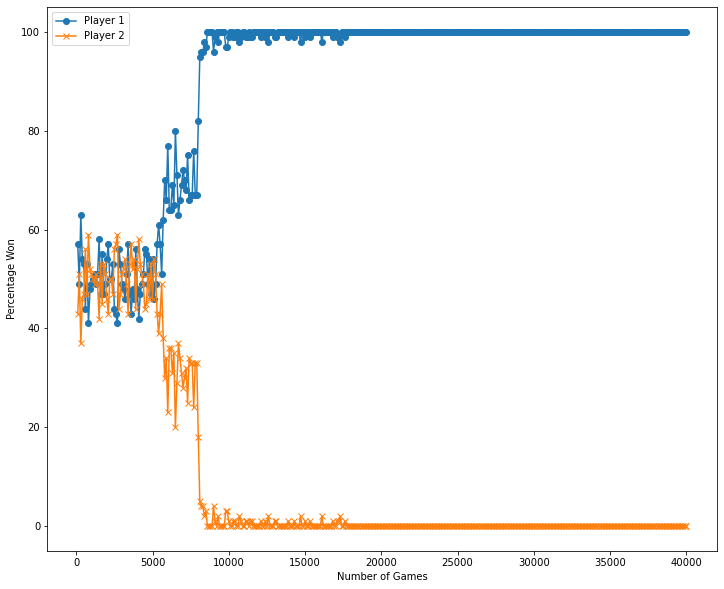

In [112]:
figure(figsize=(12,10))
plot(number_of_iterations,percentage_won_player1,'-o',label='Player 1')
plot(number_of_iterations,percentage_won_player2,'-x',label='Player 2')
legend()
xlabel('Number of Games')
ylabel('Percentage Won')